# Lab 8: Neural Network

In this lab, we will start with neural network. We will learn how to build and a train a neural network using Python library Keras.

## Lab 8. Part0: Classify hand-written digits

We will take a look at a first concrete example of a neural network using Keras library: https://keras.io/. First, you have to install Keras library. Here is the instructions: https://keras.io/#installation. As you saw in documentation you have first to install TensorFlow, Theano, or CNTK and then Keras library. We recommend the TensorFlow backend. <br>
We will learn how to classify hand-written digits. Unless you already have experience with Keras or similar libraries, you will not understand everything about this first example right away. Don't worry if some steps seem arbitrary or look like magic to you! We've got to start somewhere.

The problem we are trying to solve here is to classify grayscale images of handwritten digits (28 pixels by 28 pixels), into their 10 categories (0 to 9). The dataset we will use is the MNIST dataset, a classic dataset in the machine learning community, which has been around for almost as long as the field itself and has been very intensively studied. It's a set of 60,000 training images, plus 10,000 test images, assembled by the National Institute of Standards and Technology (the NIST in MNIST) in the 1980s. You can think of "solving" MNIST as the "Hello World" of deep learning -- it's what you do to verify that your algorithms are working as expected. As you get deep in machine learning field, you will see MNIST come up over and over again, in scientific papers, blog posts, and so on.

The MNIST dataset comes pre-loaded in Keras, in the form of a set of four Numpy arrays:

In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.3.1'

The MNIST dataset comes pre-loaded in Keras, in the form of a set of four Numpy arrays:

In [100]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Our images are encoded as Numpy arrays, and the labels are simply an array of digits, ranging from 0 to 9. There is a one-to-one correspondence between the images and the labels.<br>
Let's have a look at the training data:

In [101]:
train_images.shape

(60000, 28, 28)

#### Question 1: Could you explain what each number means?

There are 60,000 images all which are size 28x28

Our workflow will be as follow: first we will present our neural network with the training data, train_images and train_labels. The network will then learn to associate images and labels. Finally, we will ask the network to produce predictions for test_images, and we will verify if these predictions match the labels from test_labels. Let's build our network:

In [102]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

The core building block of neural networks is the "layer", a data-processing module which you can conceive as a "filter" for data. Some 
data comes in, and comes out in a more useful form. Precisely, layers extract _representations_ out of the data fed into them -- hopefully 
representations that are more meaningful for the problem at hand. Most of deep learning really consists of chaining together simple layers 
which will implement a form of progressive "data distillation". A deep learning model is like a sieve for data processing, made of a 
succession of increasingly refined data filters -- the "layers".

Here our network consists of a sequence of two `Dense` layers, which are densely-connected (also called "fully-connected") neural layers. 
The second (and last) layer is a 10-way "softmax" layer, which means it will return an array of 10 probability scores (summing to 1). Each 
score will be the probability that the current digit image belongs to one of our 10 digit classes.

#### Question 2: Could you explain why we use 'relu' in first layer and 'softmax' in the second layer?

**Answer 2** Having relu as the first layer and softmax as the second layer ensures that back propagation gets done well. Usually when hacing different layers it is best to place the relu layers first as it has really good properties such as sparsity and a reduced likelihood of vanishing gradient.

To make our network ready for training, we need to pick three more things, as part of "compilation" step:

* A loss function: this is how the network will be able to measure how good a job it is doing on its training data, and thus how it will be 
able to steer itself in the right direction.
* An optimizer: this is the mechanism through which the network will update itself based on the data it sees and its loss function.
* Metrics to monitor during training and testing. Here we will only care about accuracy (the fraction of the images that were correctly 
classified).

In [103]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

#### Question 3: Could you explain why we use 'categorical_crossentropy'for loss function?

Categorical crossentropy is a loss function that is used for single label categorization. This is when only one category is applicable for each data point. In other words, an example can belong to one class only. This is good for predicting images or labels.

Before training, we will preprocess our data by reshaping it into the shape that the network expects, and scaling it so that all values are in 
the `[0, 1]` interval. Previously, our training images for instance were stored in an array of shape `(60000, 28, 28)` of type `uint8` with 
values in the `[0, 255]` interval. We transform it into a `float32` array of shape `(60000, 28 * 28)` with values between 0 and 1.

In [104]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [105]:
import numpy as np
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

As you could see from the result above that labels are digits, ranging from 0 to 9. We will turn them into vectors of 0s and 1s. We will do that with categorically encoding. Concretely, this means for instance turning the sequence [3, 5] into a 60,000-dimensional vector that would be all-zeros except for indices 3 and 5, which would be ones.

In [106]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

We are now ready to train our network, which in Keras is done via a call to the `fit` method of the network: 
we "fit" the model to its training data.

In [107]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 2s 30us/step - loss: 0.2536 - accuracy: 0.9268
Epoch 2/5
60000/60000 [==============================] - 2s 29us/step - loss: 0.1057 - accuracy: 0.9680
Epoch 3/5
60000/60000 [==============================] - 2s 29us/step - loss: 0.0697 - accuracy: 0.9791
Epoch 4/5
60000/60000 [==============================] - 2s 29us/step - loss: 0.0501 - accuracy: 0.9850
Epoch 5/5
60000/60000 [==============================] - 2s 29us/step - loss: 0.0370 - accuracy: 0.9890


Two quantities are being displayed during training: the "loss" of the network over the training data, and the accuracy of the network over 
the training data.

We quickly reach an accuracy of 0.989 (i.e. 98.9%) on the training data. Now let's check that our model performs well on the test set too:

In [108]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 16us/step


In [110]:
print('test_acc:', test_acc)

test_acc: 0.9800000190734863


Our test set accuracy turns out to be 97.8% -- that's quite a bit lower than the training set accuracy. 

#### Question 4: What will be an example of overfiting here?

It looks like because the model is reporting better accuracy on the training set it is training too much only for the samples in the training set and is the reason why it performs slightly worse on the test set.

#### Question 5: Try to play with numbers of epochs and batch_size. What is your result compared to what we got?

In [241]:
network.fit(train_images, train_labels, epochs=10, batch_size=64)

Epoch 1/10
60000/60000 [==============================] - 3s 55us/step - loss: 0.0345 - accuracy: 0.9895
Epoch 2/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.0261 - accuracy: 0.9922
Epoch 3/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.0215 - accuracy: 0.9937
Epoch 4/10
60000/60000 [==============================] - 3s 51us/step - loss: 0.0169 - accuracy: 0.9950
Epoch 5/10
60000/60000 [==============================] - 3s 51us/step - loss: 0.0136 - accuracy: 0.9959
Epoch 6/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.0114 - accuracy: 0.9964
Epoch 7/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.0088 - accuracy: 0.9975
Epoch 8/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.0066 - accuracy: 0.9980
Epoch 9/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.0065 - accuracy: 0.9980
Epoch 10/10
60000/60000 [==============================

In [242]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 0s 19us/step
test_acc: 0.9825000166893005


Halving the batch size but doubling the epochs gave us a boost of .25% in test accuracy. The accuracy in the training data almost went to 100% which might show more overfitting. 

In [243]:
network.fit(train_images, train_labels, epochs=10, batch_size=128)

Epoch 1/10
60000/60000 [==============================] - 2s 30us/step - loss: 0.0025 - accuracy: 0.9994
Epoch 2/10
60000/60000 [==============================] - 2s 29us/step - loss: 0.0018 - accuracy: 0.9996
Epoch 3/10
60000/60000 [==============================] - 2s 29us/step - loss: 0.0014 - accuracy: 0.9997
Epoch 4/10
60000/60000 [==============================] - 2s 29us/step - loss: 9.3825e-04 - accuracy: 0.9998
Epoch 5/10
60000/60000 [==============================] - 2s 29us/step - loss: 9.1121e-04 - accuracy: 0.9997
Epoch 6/10
60000/60000 [==============================] - 2s 29us/step - loss: 6.5919e-04 - accuracy: 0.9999
Epoch 7/10
60000/60000 [==============================] - 2s 29us/step - loss: 4.0585e-04 - accuracy: 0.9999
Epoch 8/10
60000/60000 [==============================] - 2s 29us/step - loss: 2.9871e-04 - accuracy: 0.9999
Epoch 9/10
60000/60000 [==============================] - 2s 29us/step - loss: 3.6638e-04 - accuracy: 0.9999
Epoch 10/10
60000/60000 [======

In [244]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 0s 16us/step
test_acc: 0.9843999743461609


Testing accuracy still went up by .2% but training accuracy went to 100%.

In [245]:
network.fit(train_images, train_labels, epochs=20, batch_size=32)

Epoch 1/20
60000/60000 [==============================] - 5s 89us/step - loss: 0.0014 - accuracy: 0.9995
Epoch 2/20
60000/60000 [==============================] - 5s 88us/step - loss: 9.2948e-04 - accuracy: 0.9997
Epoch 3/20
60000/60000 [==============================] - 5s 88us/step - loss: 0.0015 - accuracy: 0.9996
Epoch 4/20
60000/60000 [==============================] - 5s 88us/step - loss: 8.8709e-04 - accuracy: 0.9997
Epoch 5/20
60000/60000 [==============================] - 5s 88us/step - loss: 0.0011 - accuracy: 0.9996
Epoch 6/20
60000/60000 [==============================] - 5s 88us/step - loss: 7.3283e-04 - accuracy: 0.9998
Epoch 7/20
60000/60000 [==============================] - 5s 89us/step - loss: 7.6622e-04 - accuracy: 0.9998
Epoch 8/20
60000/60000 [==============================] - 5s 87us/step - loss: 6.1789e-04 - accuracy: 0.9998
Epoch 9/20
60000/60000 [==============================] - 5s 88us/step - loss: 5.4104e-04 - accuracy: 0.9998
Epoch 10/20
60000/60000 [======

In [246]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 0s 17us/step
test_acc: 0.9818999767303467


Testing accuracy didn't improve much.

This concludes our very first example of neural network. We learn how we could build and a train a neural network to classify handwritten digits.

## Lab 8, Part 1:   Convolutional Neural Networks (CNN) 

In this Part1, we will learn how to train CNNs. All the code is provided. The code is allowing you to prepare the data and train a CNN that classifies which digit is written in an image provided at its input. We will show how you can train 4 different CNN, ranging from simple to more complex, and let you observe how it impacts classification accuracy. 

CNN training can take quite a bit of time (particularly if GPU isn't used), so we will create a training data set that uses a subset of available data. In particular, we will define the classification problem as recognizing whether a digit in an image is 7 or not. The following piece of code shows the data preparation steps.

In [13]:
#Import the required libraries
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.utils import np_utils
from keras.optimizers import SGD

The following block selects a subset of images from the MNIST data.

In [185]:
#Load the training and testing data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_test_orig = X_test

# Select the subset from the train data for the sake of time.
np.random.seed(1)  # for reproducibilty!!
# The subset is composed of all the examples where the digit is 7, and 20,000 examples are not 7.
sevens = np.where(y_train == 7)[0].tolist()
not_sevens = np.where(y_train != 7)[0].tolist()
num_keepers = 20000
not_sevens = np.random.choice(not_sevens, num_keepers, replace=False).tolist()

subset = sevens + not_sevens
np.random.shuffle(subset) # shuffle the input

X_train = X_train[subset, :, :]
y_train = y_train[subset]

In [188]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(26265, 28, 28) (10000, 28, 28) (26265,) (10000,)


The following code creates training and test data. It would be great if you can spend a few minutes trying to understand what is going on.

In [189]:
from keras import backend as K

img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    shape_ord = (1, img_rows, img_cols)
else:  # channel_last
    shape_ord = (img_rows, img_cols, 1)

# Normalize the images:

X_train = X_train.reshape((X_train.shape[0],) + shape_ord)
X_test = X_test.reshape((X_test.shape[0],) + shape_ord)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255


# Converting the labels to binary classification(Seven =1,Not Seven=0)
Y_train = (y_train == 7).astype(int)
Y_test = (y_test == 7).astype(int)

# Converting the classes to its binary categorical form
nb_classes = 2
Y_train = np_utils.to_categorical(Y_train, nb_classes)
Y_test = np_utils.to_categorical(Y_test, nb_classes)

In [190]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(26265, 28, 28, 1) (10000, 28, 28, 1) (26265, 2) (10000, 2)


### Train a simple CNN (CNN, model 1)

The following code will show how you can define CNN, train it, and test its accuracy. 

**Step 0.** The following is a preparation step, specifying the hyperparameters.

In [33]:
# -- Initializing the values for the convolution neural network

nb_epoch = 2  # kept very low! Please increase if you have GPU

batch_size = 64
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
nb_pool = 2
# convolution kernel size
nb_conv = 3

# Vanilla SGD
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)

**Step 1.** In this step we define architecture of the CNN

Each line "model.add()" adds another layer to the neural network. The type of layer must be specified. 

In [34]:
model = Sequential()

model.add(Conv2D(nb_filters, (nb_conv, nb_conv), padding='valid', 
                 input_shape=shape_ord))  # note: the very first layer **must** always specify the input_shape
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(26, 26)))
model.add(Flatten())
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

We can check the configuration of the above model by call model.summary()

In [35]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_5 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 66        
_________________________________________________________________
activation_6 (Activation)    (None, 2)                 0         
Total params: 386
Trainable params: 386
Non-trainable params: 0
________________________________________________________

**Question 1.** From the above summary, can you explain the architecture of this CNN?

**Answer 1**. Our model has 6 layers. The first layer is the convolutional layer: our output are 32 filters each of size (28 - 3 + 1) x (28 - 3 + 1), our filter size is 3x3, so we have 32 (9 + 1 bias unit) = 320 parameters. The second layer is activation_1: we basically use the output of the first layer as input. Our third layer is max_pooling: since our pool_size is 26 x 26, which equal to the dimension of each of the filter, so our output's shape is a 1x1x32 array. Our fourth layer is flattern_1, here we take max_pooling_1's output as input and flatten the array. Our fifth layer is dense_1: our input is of size 32, we use nb_classes as the number of output units, so our output is of size 2, the number of parameters = (32 + 1) 2 = 66. Our last layer is activation_2, which uses dense_1 as input.

**Step 2.** Here, we define the loss function. You will see that the loss function is not Mean Square Error, but Cross Entropy. Cross Entropy is a very popular choice when training neural networks for classification problems.

In [36]:
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

**Step 3.** This line of code trains CNN. This is going to take about a minute. Observe that we will only have 2 epochs of training, for the sake of time. You will see how the accuracy on training and valiadion data evolves during training.

In [37]:
hist = model.fit(X_train, Y_train, batch_size=batch_size, 
                 epochs=nb_epoch, verbose=1, 
                 validation_data=(X_test, Y_test))

Train on 26265 samples, validate on 10000 samples
Epoch 1/2
26265/26265 [==============================] - 3s 104us/step - loss: 0.3696 - accuracy: 0.8530 - val_loss: 0.2197 - val_accuracy: 0.9289
Epoch 2/2
26265/26265 [==============================] - 3s 103us/step - loss: 0.2626 - accuracy: 0.9055 - val_loss: 0.1977 - val_accuracy: 0.9341


Let us plot the accuracy. 

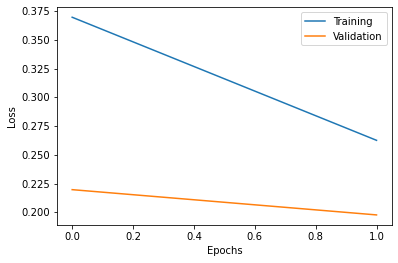

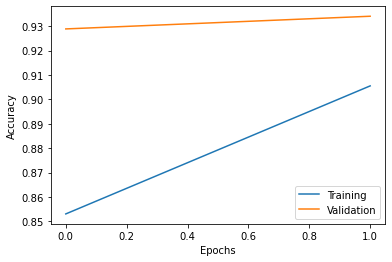

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['Training', 'Validation'])

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['Training', 'Validation'], loc='lower right')

**Step 4.** Evaluate the accuracy on test data.

In [39]:
# Evaluating the model on the test data    
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

Test Loss: 0.1977082283616066
Test Accuracy: 0.9340999722480774


Let us visualize our model Predictions!

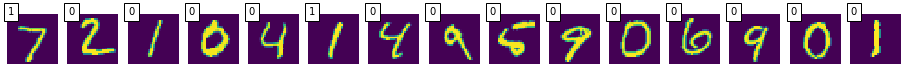

In [40]:
sliced = 15
predicted = model.predict(X_test[:sliced]).argmax(-1)

plt.figure(figsize=(16,8))
for i in range(sliced):
    plt.subplot(1, sliced, i+1)
    plt.imshow(X_test_orig[i], interpolation='nearest')
    plt.text(0, 0, predicted[i], color='black', 
             bbox=dict(facecolor='white', alpha=1))
    plt.axis('off')

**Question 2.** Can you discuss the performance of the CNN model? What kind of errors is it making?

**Answer 2.** We are making predictions on 15 test examples and only one of them is 7. The model correctly identifies that as a 7 but it also incorrectly identifies the 1 as a 7. The might be coming from the fact that the 1 has the straight line that resembles the 7.

**Question 3.** Run the training for 10 epochs. How did it impact the accuracy?

In [45]:
nb_epoch = 10

hist = model.fit(X_train, Y_train, batch_size=batch_size,
                 epochs=nb_epoch, verbose = 1,
                 validation_data=(X_test, Y_test))

Train on 26265 samples, validate on 10000 samples
Epoch 1/10
26265/26265 [==============================] - 3s 105us/step - loss: 0.1986 - accuracy: 0.9272 - val_loss: 0.1275 - val_accuracy: 0.9566
Epoch 2/10
26265/26265 [==============================] - 3s 103us/step - loss: 0.1968 - accuracy: 0.9261 - val_loss: 0.1155 - val_accuracy: 0.9619
Epoch 3/10
26265/26265 [==============================] - 3s 103us/step - loss: 0.1955 - accuracy: 0.9289 - val_loss: 0.2185 - val_accuracy: 0.9138
Epoch 4/10
26265/26265 [==============================] - 3s 103us/step - loss: 0.2000 - accuracy: 0.9269 - val_loss: 0.1525 - val_accuracy: 0.9466
Epoch 5/10
26265/26265 [==============================] - 3s 105us/step - loss: 0.1936 - accuracy: 0.9286 - val_loss: 0.1178 - val_accuracy: 0.9598
Epoch 6/10
26265/26265 [==============================] - 3s 103us/step - loss: 0.1919 - accuracy: 0.9298 - val_loss: 0.1234 - val_accuracy: 0.9572
Epoch 7/10
26265/26265 [==============================] - 3s 1

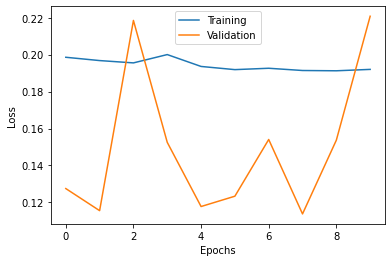

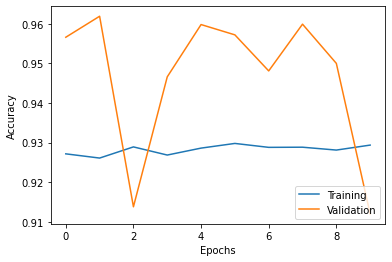

In [46]:
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['Training', 'Validation'])

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['Training', 'Validation'], loc='lower right')

In [47]:
# Evaluating the model on the test data    
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

Test Loss: 0.2207808870792389
Test Accuracy: 0.9120000004768372


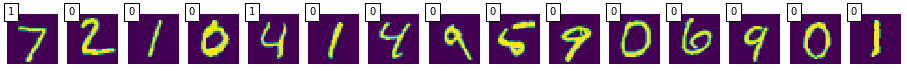

In [48]:
sliced = 15
predicted = model.predict(X_test[:sliced]).argmax(-1)

plt.figure(figsize=(16,8))
for i in range(sliced):
    plt.subplot(1, sliced, i+1)
    plt.imshow(X_test_orig[i], interpolation='nearest')
    plt.text(0, 0, predicted[i], color='black', 
             bbox=dict(facecolor='white', alpha=1))
    plt.axis('off')

**Answer 3.** The model still had the same accuracy and predicted one of the labels wrong. It predicted the number 4 to be 7.

### Train a more complicated CNN (CNN, model 2)

Now, we will define a more complicated CNN architecture.

In [49]:
model = Sequential()
model.add(Conv2D(nb_filters, (nb_conv, nb_conv),
                 padding='valid', input_shape=shape_ord))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [50]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_7 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               692352    
_________________________________________________________________
activation_8 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 2)                

In [51]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=batch_size, 
          epochs=nb_epoch,verbose=1,
          validation_data=(X_test, Y_test))

Train on 26265 samples, validate on 10000 samples
Epoch 1/10
26265/26265 [==============================] - 5s 191us/step - loss: 0.1939 - accuracy: 0.9281 - val_loss: 0.0788 - val_accuracy: 0.9759
Epoch 2/10
26265/26265 [==============================] - 5s 185us/step - loss: 0.0931 - accuracy: 0.9687 - val_loss: 0.0639 - val_accuracy: 0.9800
Epoch 3/10
26265/26265 [==============================] - 5s 184us/step - loss: 0.0817 - accuracy: 0.9721 - val_loss: 0.0605 - val_accuracy: 0.9808
Epoch 4/10
26265/26265 [==============================] - 5s 182us/step - loss: 0.0753 - accuracy: 0.9748 - val_loss: 0.0512 - val_accuracy: 0.9840
Epoch 5/10
26265/26265 [==============================] - 5s 187us/step - loss: 0.0703 - accuracy: 0.9771 - val_loss: 0.0508 - val_accuracy: 0.9841
Epoch 6/10
26265/26265 [==============================] - 5s 186us/step - loss: 0.0663 - accuracy: 0.9783 - val_loss: 0.0453 - val_accuracy: 0.9860
Epoch 7/10
26265/26265 [==============================] - 5s 1

In [52]:
#Evaluating the model on the test data    
score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score)
print('Test accuracy:', accuracy)

Test score: 0.04011625054273754
Test accuracy: 0.9872000217437744


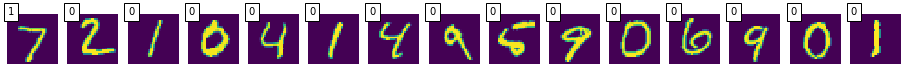

In [54]:
sliced = 15
predicted = model.predict(X_test[:sliced]).argmax(-1)

plt.figure(figsize=(16,8))
for i in range(sliced):
    plt.subplot(1, sliced, i+1)
    plt.imshow(X_test_orig[i], interpolation='nearest')
    plt.text(0, 0, predicted[i], color='black', 
             bbox=dict(facecolor='white', alpha=1))
    plt.axis('off')

**Question 4.** Can you explain the architecture of this CNN (model 2) and how is it different from the first CNN you trained (model 1)? Compare their performance by looking at the visualizstions.

In [55]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_7 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               692352    
_________________________________________________________________
activation_8 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 2)                

Unlike model 1, which has 6 layers, this model has 8 layers! The first 2 layers are similar to the first two layers in model 1. However, in the third layer, instead of using pool_size = (26,26), we use pool_size = (nb_pool,nb_pool) where nb_pool = 2, as a result, we end up having output shape of 13 by 13 by 32. Flattenning the pooling result gives a result of size 5408 (=13 x 13 x 32). Our fifth layer takes result of flatten as input and gives an output of size 128, so we end up having 692352 parameters (= 128 * 5408). We use dense_2's output as input for the sixth layer. In the seventh layer, we take it result of dense and produces an output of size nb_classes = 2, so we end up having 258 parameters. Our last layer takes the result of dense_3, and applies softmax regression to obtain the probability. There are two main difference in this model: 1. the number of layers, 2. the pool_size! Just like model 1 with nb_epoch = 10, model 2 does way better than model 1 with nb_epoch = 2

In addition this model has much better accuracy than the other 2 ones. It predicts every label correctly and also has 98.7% accuracy compared to 93% and 91%.

### Adding more convolutional layers and MaxPooling layers (CNN, model 3)

Now, we will define an even more complicated CNN architecture.

In [56]:
model = Sequential()
model.add(Conv2D(nb_filters, (nb_conv, nb_conv),
                 padding='valid', input_shape=shape_ord))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Conv2D(nb_filters, (nb_conv, nb_conv), 
                 padding='valid'))
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Flatten())
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [57]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_10 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 2)                

In [58]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=batch_size, 
          epochs=nb_epoch,verbose=1,
          validation_data=(X_test, Y_test))

Train on 26265 samples, validate on 10000 samples
Epoch 1/10
26265/26265 [==============================] - 6s 219us/step - loss: 0.3192 - accuracy: 0.8591 - val_loss: 0.1110 - val_accuracy: 0.9734
Epoch 2/10
26265/26265 [==============================] - 6s 214us/step - loss: 0.1110 - accuracy: 0.9639 - val_loss: 0.0787 - val_accuracy: 0.9766
Epoch 3/10
26265/26265 [==============================] - 6s 211us/step - loss: 0.0909 - accuracy: 0.9687 - val_loss: 0.0676 - val_accuracy: 0.9787
Epoch 4/10
26265/26265 [==============================] - 6s 211us/step - loss: 0.0825 - accuracy: 0.9713 - val_loss: 0.0634 - val_accuracy: 0.9798
Epoch 5/10
26265/26265 [==============================] - 6s 214us/step - loss: 0.0769 - accuracy: 0.9740 - val_loss: 0.0630 - val_accuracy: 0.9800
Epoch 6/10
26265/26265 [==============================] - 6s 212us/step - loss: 0.0726 - accuracy: 0.9759 - val_loss: 0.0589 - val_accuracy: 0.9806
Epoch 7/10
26265/26265 [==============================] - 6s 2

In [59]:
#Evaluating the model on the test data    
score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score)
print('Test accuracy:', accuracy)

Test score: 0.043193632795661685
Test accuracy: 0.9869999885559082


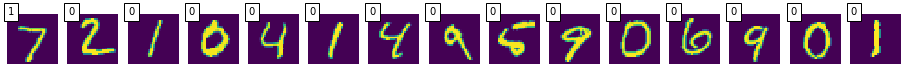

In [60]:
sliced = 15
predicted = model.predict(X_test[:sliced]).argmax(-1)

plt.figure(figsize=(16,8))
for i in range(sliced):
    plt.subplot(1, sliced, i+1)
    plt.imshow(X_test_orig[i], interpolation='nearest')
    plt.text(0, 0, predicted[i], color='black', 
             bbox=dict(facecolor='white', alpha=1))
    plt.axis('off')

Another 0.2 % lift from 97.8% to 98.0%. This model sees clearly "9" is different than "7"! 

### Wrapping all the code together and play with hyperparameters

The code below wraps up the pieces of codes above into a single function and allows you to play with the hyperparameters by changing the arguments.


In [61]:
# Function for constructing the convolution neural network
# Feel free to add parameters, if you want

def build_model(num_conv = 1, conv_activation = "relu", num_dense = 1, dense_activation  = "relu", 
               dropout = True, max_pooling = True):
    """"""
    model = Sequential()
    model.add(Conv2D(nb_filters, (nb_conv, nb_conv), 
                     padding='valid',
                     input_shape=shape_ord))
    model.add(Activation(conv_activation))
    
    for i in range(num_conv-1):
        model.add(Conv2D(nb_filters, (nb_conv, nb_conv)))
        model.add(Activation(conv_activation))
        
    if max_pooling is True:
        model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
        
    if dropout is True:
        model.add(Dropout(0.25))
    
    model.add(Flatten())

    if dropout is True:
        model.add(Dropout(0.5))
    
    for i in range(num_dense-1):
        model.add(Dense(128))
        model.add(Activation(dense_activation))
        
    model.add(Dense(nb_classes))
    model.add(Activation('softmax'))
    
    model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

    model.fit(X_train, Y_train, batch_size=batch_size, 
              epochs=nb_epoch,verbose=1,
              validation_data=(X_test, Y_test))
          

    #Evaluating the model on the test data    
    score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
    print(num_conv , 'convolutional layers,', num_dense, "dense layers")
    if max_pooling: print("With max pooling")
    if dropout: print("With dropout")
    print('Test score:', score)
    print('Test accuracy:', accuracy)
    slice = 15
    predicted = model.predict(X_test[:slice]).argmax(-1)

    plt.figure(figsize=(16,8))
    for i in range(slice):
        plt.subplot(1, slice, i+1)
        plt.imshow(X_test_orig[i], interpolation='nearest')
        plt.text(0, 0, predicted[i], color='black', 
             bbox=dict(facecolor='white', alpha=1))
        plt.axis('off')

An example of running this function

Train on 26265 samples, validate on 10000 samples
Epoch 1/10
26265/26265 [==============================] - 5s 195us/step - loss: 0.2073 - accuracy: 0.9258 - val_loss: 0.0932 - val_accuracy: 0.9751
Epoch 2/10
26265/26265 [==============================] - 5s 192us/step - loss: 0.1194 - accuracy: 0.9596 - val_loss: 0.0744 - val_accuracy: 0.9782
Epoch 3/10
26265/26265 [==============================] - 5s 197us/step - loss: 0.1078 - accuracy: 0.9616 - val_loss: 0.0646 - val_accuracy: 0.9805
Epoch 4/10
26265/26265 [==============================] - 5s 191us/step - loss: 0.1050 - accuracy: 0.9634 - val_loss: 0.0708 - val_accuracy: 0.9788
Epoch 5/10
26265/26265 [==============================] - 5s 199us/step - loss: 0.1002 - accuracy: 0.9658 - val_loss: 0.0642 - val_accuracy: 0.9806
Epoch 6/10
26265/26265 [==============================] - 5s 197us/step - loss: 0.0985 - accuracy: 0.9671 - val_loss: 0.0657 - val_accuracy: 0.9797
Epoch 7/10
26265/26265 [==============================] - 5s 1

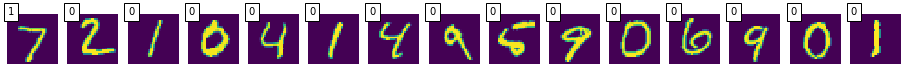

In [62]:
# Here is an example of running build_model() with default hyperparameters
build_model()

Train on 26265 samples, validate on 10000 samples
Epoch 1/10
26265/26265 [==============================] - 22s 819us/step - loss: 0.3267 - accuracy: 0.8578 - val_loss: 0.0752 - val_accuracy: 0.9757
Epoch 2/10
26265/26265 [==============================] - 22s 821us/step - loss: 0.1143 - accuracy: 0.9608 - val_loss: 0.0706 - val_accuracy: 0.9778
Epoch 3/10
26265/26265 [==============================] - 22s 839us/step - loss: 0.0980 - accuracy: 0.9667 - val_loss: 0.0559 - val_accuracy: 0.9825
Epoch 4/10
26265/26265 [==============================] - 21s 801us/step - loss: 0.0860 - accuracy: 0.9708 - val_loss: 0.0478 - val_accuracy: 0.9852
Epoch 5/10
26265/26265 [==============================] - 22s 827us/step - loss: 0.0776 - accuracy: 0.9741 - val_loss: 0.0453 - val_accuracy: 0.9854
Epoch 6/10
26265/26265 [==============================] - 21s 802us/step - loss: 0.0706 - accuracy: 0.9770 - val_loss: 0.0418 - val_accuracy: 0.9863
Epoch 7/10
26265/26265 [==============================] 

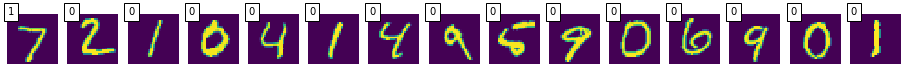

In [63]:
# Here is an example of running build_model() with new hyperparameters
build_model(num_conv = 3, num_dense = 3)

This is the best accuracy so far. We have achieved 99% accuracy although it did take a long time to train this model.

Train on 26265 samples, validate on 10000 samples
Epoch 1/10
26265/26265 [==============================] - 5s 195us/step - loss: 0.2177 - accuracy: 0.9209 - val_loss: 0.0906 - val_accuracy: 0.9767
Epoch 2/10
26265/26265 [==============================] - 5s 190us/step - loss: 0.1213 - accuracy: 0.9579 - val_loss: 0.0799 - val_accuracy: 0.9774
Epoch 3/10
26265/26265 [==============================] - 5s 189us/step - loss: 0.1083 - accuracy: 0.9628 - val_loss: 0.0722 - val_accuracy: 0.9786
Epoch 4/10
26265/26265 [==============================] - 5s 189us/step - loss: 0.1031 - accuracy: 0.9641 - val_loss: 0.0634 - val_accuracy: 0.9811
Epoch 5/10
26265/26265 [==============================] - 5s 188us/step - loss: 0.1000 - accuracy: 0.9647 - val_loss: 0.0642 - val_accuracy: 0.9812
Epoch 6/10
26265/26265 [==============================] - 5s 189us/step - loss: 0.0971 - accuracy: 0.9665 - val_loss: 0.0722 - val_accuracy: 0.9783
Epoch 7/10
26265/26265 [==============================] - 5s 1

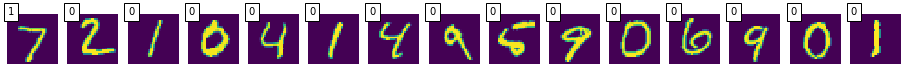

In [65]:
#Timing how long it takes to build the model and test it.
%timeit -n1 -r1 build_model()

This model was able to get an accuracy of 98.3% by taking way less time training than the model previous. 

**Question 5.** Try to change some of the **hyperparameters** without exploding the computational resources on your computer. 
What is the best accuracy you can get? How many parameters are there of each model? How long does the training take?

The number of parameters in all of these models equal to the number of parameters in build_model, which is 6. If we don't specify anything, that means we use the default paramters

Train on 26265 samples, validate on 10000 samples
Epoch 1/10
26265/26265 [==============================] - 4s 135us/step - loss: 0.2246 - accuracy: 0.9148 - val_loss: 0.0991 - val_accuracy: 0.9737
Epoch 2/10
26265/26265 [==============================] - 4s 133us/step - loss: 0.1071 - accuracy: 0.9644 - val_loss: 0.0755 - val_accuracy: 0.9779
Epoch 3/10
26265/26265 [==============================] - 4s 134us/step - loss: 0.0948 - accuracy: 0.9679 - val_loss: 0.0663 - val_accuracy: 0.9801
Epoch 4/10
26265/26265 [==============================] - 3s 133us/step - loss: 0.0891 - accuracy: 0.9697 - val_loss: 0.0650 - val_accuracy: 0.9799
Epoch 5/10
26265/26265 [==============================] - 3s 133us/step - loss: 0.0855 - accuracy: 0.9714 - val_loss: 0.0647 - val_accuracy: 0.9797
Epoch 6/10
26265/26265 [==============================] - 4s 133us/step - loss: 0.0828 - accuracy: 0.9720 - val_loss: 0.0665 - val_accuracy: 0.9786
Epoch 7/10
26265/26265 [==============================] - 3s 1

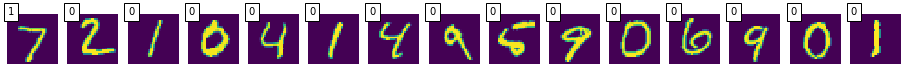

In [66]:
%timeit -n1 -r1 build_model(dropout = False)

Took even less time while having the same accuracy. 36 seconds vs 51 seconds.

Train on 26265 samples, validate on 10000 samples
Epoch 1/10
26265/26265 [==============================] - 15s 567us/step - loss: 0.2338 - accuracy: 0.9035 - val_loss: 0.0728 - val_accuracy: 0.9777
Epoch 2/10
26265/26265 [==============================] - 15s 575us/step - loss: 0.1143 - accuracy: 0.9596 - val_loss: 0.0735 - val_accuracy: 0.9760
Epoch 3/10
26265/26265 [==============================] - 15s 562us/step - loss: 0.0995 - accuracy: 0.9650 - val_loss: 0.0677 - val_accuracy: 0.9785
Epoch 4/10
26265/26265 [==============================] - 15s 574us/step - loss: 0.0918 - accuracy: 0.9687 - val_loss: 0.0568 - val_accuracy: 0.9821
Epoch 5/10
26265/26265 [==============================] - 15s 589us/step - loss: 0.0871 - accuracy: 0.9711 - val_loss: 0.0505 - val_accuracy: 0.9844
Epoch 6/10
26265/26265 [==============================] - 15s 563us/step - loss: 0.0793 - accuracy: 0.9738 - val_loss: 0.0457 - val_accuracy: 0.9857
Epoch 7/10
26265/26265 [==============================] 

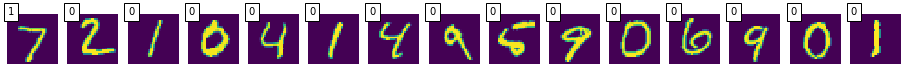

In [67]:
%timeit -n1 -r1 build_model(num_conv = 2, num_dense = 2)

Accuracy went up to 98.7%. A gain of .4% for 2 extra minutes of training.

#### Question 6 (20% of the grade)

Can you train a model to output 10 classes instead of 2 binary classes? We can use this model to classify images into 10 digits of the mnist data set. Again, we will only train our model on a subset of the training data. The following steps will help you to build such a model.

    * 1. Select 20,000 examples randomly from X_train, since we want all 10 digits present in our training data.
    * 2. Convert Y_train and Y_test to categorical.
    * 3. Call the build_model() on the X_train and Y_train.

In [213]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_test_orig = X_test

randomEx = np.random.choice(X_train.shape[0], 20000).tolist()
X_train = X_train[randomEx, :, :]
Y_train = y_train[randomEx]

In [214]:
nb_classes = 10
Y_train = np_utils.to_categorical(Y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [215]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(20000, 28, 28) (10000, 28, 28) (20000, 10) (10000, 10)


In [216]:
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    shape_ord = (1, img_rows, img_cols)
else:  # channel_last
    shape_ord = (img_rows, img_cols, 1)

# Normalize the images:

X_train = X_train.reshape((X_train.shape[0],) + shape_ord)
X_test = X_test.reshape((X_test.shape[0],) + shape_ord)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

Train on 20000 samples, validate on 10000 samples
Epoch 1/10
20000/20000 [==============================] - 5s 245us/step - loss: 0.8195 - accuracy: 0.7586 - val_loss: 0.3594 - val_accuracy: 0.9023
Epoch 2/10
20000/20000 [==============================] - 5s 232us/step - loss: 0.4555 - accuracy: 0.8595 - val_loss: 0.3201 - val_accuracy: 0.9073
Epoch 3/10
20000/20000 [==============================] - 5s 233us/step - loss: 0.4043 - accuracy: 0.8744 - val_loss: 0.3065 - val_accuracy: 0.9123
Epoch 4/10
20000/20000 [==============================] - 5s 233us/step - loss: 0.3711 - accuracy: 0.8902 - val_loss: 0.2940 - val_accuracy: 0.9122
Epoch 5/10
20000/20000 [==============================] - 5s 237us/step - loss: 0.3502 - accuracy: 0.8946 - val_loss: 0.2655 - val_accuracy: 0.9242
Epoch 6/10
20000/20000 [==============================] - 5s 242us/step - loss: 0.3166 - accuracy: 0.9064 - val_loss: 0.2474 - val_accuracy: 0.9293
Epoch 7/10
20000/20000 [==============================] - 5s 2

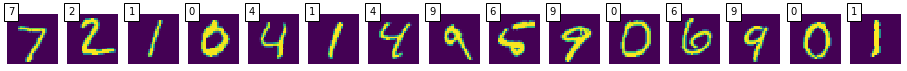

In [217]:
build_model()

The result is actually pretty good. It almost has 95% accuracy and as far as the labels it only got one wrong. It predicted the 5 to be 6. Although that is a fairly poor written 5.

#### Question 7 (30% of the grade) 

Train a model on CIFAR10 dataset, which is described in https://www.cs.toronto.edu/~kriz/cifar.html. You can load the dataset from Keras, too. CIFAR10 small image classification contains 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.

```python
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
```

Again, we will only train our model on a subset of the training data. The following steps will help you to build such a model.

    * 1. Select 20,000 examples randomly from X_train, since we want all 10 categories present in our training data.
    * 2. Convert Y_train and Y_test to categorical.
    * 3. Call the build_model() on the X_train and Y_train.

In [232]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
X_test_orig = x_test

randomEx = np.random.choice(x_train.shape[0], 20000).tolist()
X_train = x_train[randomEx, :, :]
X_test = x_test
Y_train = y_train[randomEx]

nb_classes = 10
Y_train = np_utils.to_categorical(Y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [233]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(20000, 32, 32, 3) (10000, 32, 32, 3) (20000, 10) (10000, 10)


In [235]:
print(X_train.max(), X_test.max(), Y_train.max(), Y_test.max())
print(X_train.min(), X_test.min(), Y_train.min(), Y_test.min())


255 255 1.0 1.0
0 0 0.0 0.0


In [236]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

In [237]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(20000, 32, 32, 3) (10000, 32, 32, 3) (20000, 10) (10000, 10)


In [238]:
shape_ord = (32, 32, 3)

Train on 20000 samples, validate on 10000 samples
Epoch 1/10
20000/20000 [==============================] - 19s 972us/step - loss: 2.0547 - accuracy: 0.2488 - val_loss: 1.8435 - val_accuracy: 0.3572
Epoch 2/10
20000/20000 [==============================] - 19s 957us/step - loss: 1.7690 - accuracy: 0.3666 - val_loss: 1.6192 - val_accuracy: 0.4236
Epoch 3/10
20000/20000 [==============================] - 19s 968us/step - loss: 1.5884 - accuracy: 0.4274 - val_loss: 1.4739 - val_accuracy: 0.4745
Epoch 4/10
20000/20000 [==============================] - 19s 970us/step - loss: 1.4780 - accuracy: 0.4685 - val_loss: 1.3922 - val_accuracy: 0.5045
Epoch 5/10
20000/20000 [==============================] - 19s 949us/step - loss: 1.3858 - accuracy: 0.5074 - val_loss: 1.3457 - val_accuracy: 0.5193
Epoch 6/10
20000/20000 [==============================] - 19s 950us/step - loss: 1.3171 - accuracy: 0.5257 - val_loss: 1.2961 - val_accuracy: 0.5403
Epoch 7/10
20000/20000 [==============================] 

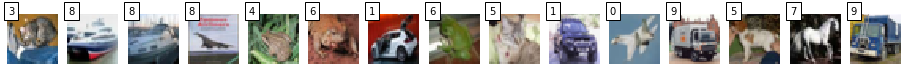

In [240]:
%timeit -n1 -r1 build_model(num_conv = 2, num_dense = 2)

I was able to achieve 58% accuracy by using num_conv = 2, num_dense = 2. This is still far from being a predictor but I believe by training a lot longer with more eponch and higher conv and dense I can get at least up to 70% accuracy. In the sample above it is having a hard time telling the difference between frog and deer and airplane and ship. 